In [2]:
from matplotlib import pyplot
import numpy as np

In [3]:
with open("./samples/sample_sents_prob.npy", 'rb') as f:
    prob_set = np.load(f)
with open("./samples/sample_sents_idxs.npy", 'rb') as f:
    idx_set = np.load(f)
with open("./samples/sample_sents_tokens.npy", 'rb') as f:
    tk_set = np.load(f)

print("vocab size: ", len(prob_set[0,0]))
print("sentences number: ", len(idx_set[0]))

vocab size:  50257
sentences number:  41


## 1. calculate entropy at each step

In [4]:
entropy_ls = []
for i in range(len(prob_set)):
    for j in range(len(prob_set[i])):
        
        entropy = -prob_set[i,j] @ np.log2(prob_set[i,j])
        entropy_ls.append(entropy)

Text(0.5, 0, 'entropy')

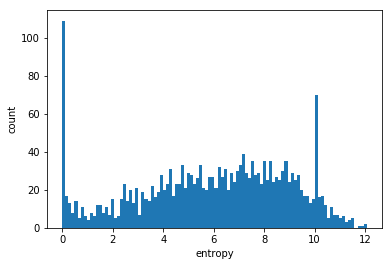

In [5]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
x = entropy_ls
plt.hist(x, bins=100)
plt.ylabel('count');
plt.xlabel('entropy')

## 2. check a sample sentence entropy 

In [6]:
entropy_ls = []
i = 48
for j in range(len(prob_set[i])):

    entropy = np.sum(-prob_set[i,j] * np.log2(prob_set[i,j]))
    entropy_ls.append(entropy)

Text(0.5, 0, 'entropy')

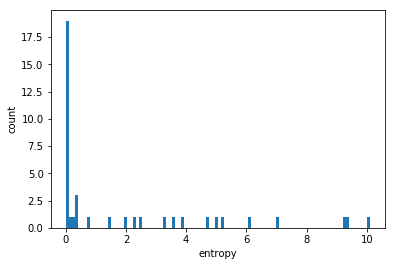

In [7]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
x = entropy_ls
plt.hist(x,bins=100)
plt.ylabel('count');
plt.xlabel('entropy')

## 3. bin embedding method

In [8]:
N_buckets = 8
N_vocab = 50257
bucket_size = N_vocab // N_buckets
entropy_ls = []
for i in range(len(prob_set)):
    for j in range(len(prob_set[i])):
        whole_p = prob_set[i,j]
        bins_p_ls = [np.sum(whole_p[k*bucket_size: (k+1)*bucket_size]) for k in range(N_buckets-1)]
        bins_p_ls.append(np.sum(whole_p[(N_buckets-1)*bucket_size:]))
        bins_p = np.array(bins_p_ls)
        entropy = -bins_p @ np.log2(bins_p)
        entropy_ls.append(entropy)

Text(0.5, 0, 'entropy')

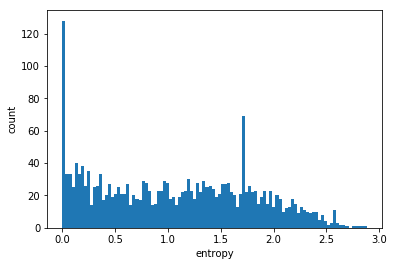

In [9]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
x = entropy_ls
plt.hist(x, bins=100)
plt.ylabel('count');
plt.xlabel('entropy')

In [11]:
entropys = np.array(entropy_ls)
mean = np.mean(entropys)
var = np.var(entropys)
median = np.median(entropys)

In [12]:
print("entropy distribution stats")
print("mean: ", mean, "variance: ", var, "median: ",median)

entropy distribution stats
mean:  1.0701602250174433 variance:  0.5310554398056302 median:  1.0589543187748816


## 5. random shuffle vocab entropy distribution plot

In [14]:
index_ls = list(range(N_vocab))
N_buckets = 8
N_vocab = 50257
bucket_size = N_vocab // N_buckets

np.random.shuffle(index_ls)

entropy_ls = []
for i in range(len(prob_set)):
    for j in range(len(prob_set[i])):
        whole_p = prob_set[i,j][index_ls]
        
        bins_p_ls = [np.sum(whole_p[k*bucket_size: (k+1)*bucket_size]) for k in range(N_buckets-1)]
        bins_p_ls.append(np.sum(whole_p[(N_buckets-1)*bucket_size:]))
        bins_p = np.array(bins_p_ls)
        entropy = -bins_p @ np.log2(bins_p)
        entropy_ls.append(entropy)

Text(0.5, 0, 'entropy')

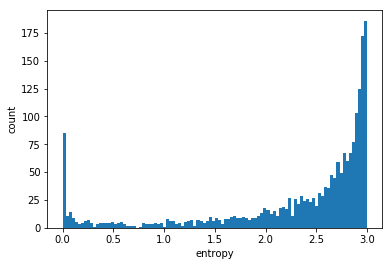

In [15]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
x = entropy_ls
plt.hist(x, bins=100)
plt.ylabel('count');
plt.xlabel('entropy')

In [16]:
entropys = np.array(entropy_ls)
mean = np.mean(entropys)
var = np.var(entropys)
median = np.median(entropys)
print("entropy distribution stats")
print("mean: ", mean, "variance: ", var, "median: ",median)

entropy distribution stats
mean:  2.305038478763132 variance:  0.7263859842824284 median:  2.674860520966889


## 6. KL divergence

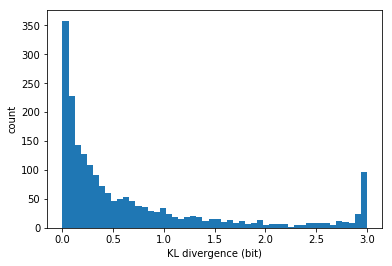

In [17]:
import matplotlib.pyplot as plt
import numpy as np
# %matplotlib inline
f = plt.figure()
x = 3 - np.array(entropy_ls)
plt.hist(x, bins=50)
plt.ylabel('count');
plt.xlabel('KL divergence (bit)')

plt.show()

f.savefig("KL.pdf")

## 7. huffman KL

In [5]:
from huffman import build_min_heap, huffman_tree, tv_huffman
import time 
entropy_ls = []
for i in range(len(prob_set)):
    for j in range(len(prob_set[i])):
        p = prob_set[i,j]
        heap = build_min_heap(p)
        start_time = time.time()
        tree = huffman_tree(heap)
        end_time = time.time()
        time_diff = end_time - start_time
        entropy = tv_huffman(tree, p)
        entropy_ls.append(entropy)
    print(time_diff)

0.18086862564086914
0.1814568042755127
0.1811816692352295
0.18133974075317383
0.18090343475341797
0.18214631080627441
0.18069911003112793
0.18113327026367188
0.1812286376953125
0.1816577911376953
0.18108654022216797
0.18172192573547363
0.18178367614746094
0.18185162544250488
0.181898832321167
0.1808938980102539
0.18141889572143555
0.18092942237854004
0.1816849708557129
0.1816234588623047
0.18149399757385254
0.1814732551574707
0.18223285675048828
0.18181228637695312
0.18217682838439941
0.18214178085327148
0.18228960037231445
0.18323874473571777
0.18213105201721191
0.18186211585998535
0.18234539031982422
0.18163323402404785
0.18158507347106934
0.18282079696655273
0.1819901466369629
0.18200302124023438
0.18413567543029785
0.18240809440612793
0.18257498741149902
0.1838221549987793
0.18305325508117676
0.1818842887878418
0.1819782257080078
0.18168950080871582
0.1821756362915039
0.18121027946472168
0.18140721321105957
0.18227052688598633
0.1817631721496582
0.18213152885437012


In [8]:
kl_ls = [kl for tv, kl in entropy_ls]

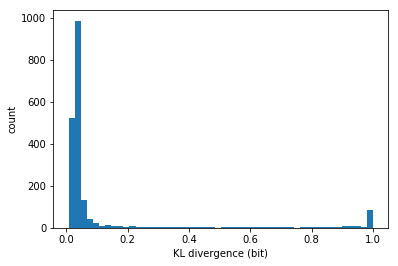

In [9]:
import matplotlib.pyplot as plt
import numpy as np
# %matplotlib inline
f = plt.figure()
x = np.array(kl_ls)
plt.hist(x, bins=50)
plt.ylabel('count');
plt.xlabel('KL divergence (bit)')

plt.show()

f.savefig("huffman_KL.pdf")

In [10]:
entropys = np.array(kl_ls)
mean = np.mean(entropys)
var = np.var(entropys)
median = np.median(entropys)
print("entropy distribution stats")
print("mean: ", mean, "variance: ", var, "median: ",median)

0.1236073943203487 0.06345455840699488 0.030881696101359966


## 8. some stats

In [11]:
count = 0
for kl in kl_ls:
    if kl > 0.9:
        count += 1
print("kl greater than 0.9 numbers: ", count)

115


In [12]:
min_kl = 1000.0
for kl in kl_ls:
    if kl < min_kl:
        min_kl = kl
print("min kl: ", min_kl)

1696


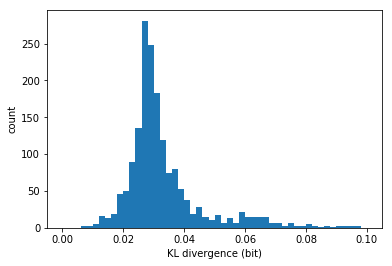

In [30]:
min_ls = []
for kl in kl_ls:
    if kl <= 0.1:
        min_ls.append(kl)
print(len(min_ls), "tokens have less than 0.1 KL")
f = plt.figure()
x = np.array(min_ls)
plt.hist(x, bins=50, range=[0.0, 0.1])
plt.ylabel('count');
plt.xlabel('KL divergence (bit)')

plt.show()

f.savefig("huffman_KL_0.1.pdf")